### Prepared by Abhishek Kumar
### https://www.linkedin.com/in/abhishekkumar-0311/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# To get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [3]:
# Setup : DataFrame creation

salary = [['1','Abhishek Kumar','AIML', 'Machine Learning Engineer','M', 'Y', '04051990', 1121000],
          ['2','Arjun Kumar','DM', 'Tech Lead','M', 'Y', '09031992', 109000],
          ['3','Vivek Raj','DM', 'Devops Engineer','M', 'N', np.NaN , 827000],
          ['4','Mika Singh','DM', 'Data Analyst','F', 'Y', '15101991',  np.NaN],
          ['5','Anusha Yenduri','AIML', 'Data Scientist','F', 'Y', '01011989',  921000],
          ['6','Ritesh Srivastava','AIML', 'Data Engineer','M', 'Y', np.NaN, 785000]]

columns_name=['Emp_Id','Emp_Name','Department','Role','Gender', 'WFH Status', 'DOB', 'Salary']

emp_df = pd.DataFrame(salary,columns=columns_name)
emp_df

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


# 1. Group By: Split-Apply-Combine


    i. df.groupby()
    ii. .apply() , .agg(), .filter()
    iii. 

In [4]:
emp_df_1 = emp_df.copy()
emp_df_1

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


In [5]:
grouped_1 = emp_df_1.groupby('Department')
grouped_1

## 1.1 Meta Methods

    Meta methods are less concerned with the original object on which .groupby() is called.
    Mainly provide high-level information such as the number of groups and indices of those groups.

In [6]:
grouped_1.groups

{'AIML': [0, 4, 5], 'DM': [1, 2, 3]}

In [7]:
grouped_1.get_group('DM')

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN


In [8]:
grouped_1.indices

{'AIML': array([0, 4, 5], dtype=int64), 'DM': array([1, 2, 3], dtype=int64)}

In [9]:
grouped_1.ndim

2

In [10]:
grouped_1.ngroups

2

In [11]:
# Assign this to a new variable. This will assign a number to each group
grouped_1.ngroup()

0    0
1    1
2    1
3    1
4    0
5    0
dtype: int64

In [12]:
grouped_1.dtypes

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,object,object,object,object,object,object,float64
DM,object,object,object,object,object,object,float64


In [13]:
#for i in range(2):
#    grouped_1.__iter__()

In [14]:
grouped_1.size()

Department
AIML    3
DM      3
dtype: int64

In [15]:
len(grouped_1)

2

## 1.2 Filter Methods

    Filter methods return a subset of the original DataFrame. 
    Most common is .filter() to drop entire groups based on some comparative statistic about that group and its sub-table. 
    There are a number of methods that exclude particular rows from each group.
    
- **https://stackoverflow.com/questions/55583246/what-is-different-between-groupby-first-groupby-nth-groupby-head-when-as-index**

In [16]:
grouped_2 = emp_df_1.groupby('Department')
grouped_2

## ```first/last```

This will return the **first/last non-null value** within each group. Oddly enough it will not skip None, though this can be made possible with the kwarg dropna=True. As a result, **you may return values for columns that were part of different rows originally:**

In [17]:
grouped_2.first()

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,1,Abhishek Kumar,Machine Learning Engineer,M,Y,04051990,1121000.0
DM,2,Arjun Kumar,Tech Lead,M,Y,09031992,109000.0


In [18]:
grouped_2.last()

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,01011989,785000.0
DM,4,Mika Singh,Data Analyst,F,Y,15101991,827000.0


## ```head(n)/tail(n)```
Returns the **top/bottom n rows** within a group. **Values remain bound within rows**. If you give it an n that is more than the number of rows, it returns all rows in that group without complaining:

In [19]:
grouped_2.head(2)

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0


In [20]:
grouped_2.tail(1)

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


## ```nth```

- GroupBy.nth(n, dropna=None)[source]
    - Take the nth row from each group if n is an int, or a subset of rows if n is a list of ints.
    - If dropna, will take the nth non-null row, dropna is either ‘all’ or ‘any’; this is equivalent to calling dropna(how=dropna) before the groupby.

This takes the nth row, so again **values remain bound within the row**. ```.nth(0)``` is the same as .head(1), though they have different uses. For instance, if you need the 0th and 2nd row, that's difficult to do with ```.head()```, but easy with ```.nth([0,2])```. Also it's fair easier to write ```.head(10)``` than ```.nth(list(range(10)))).```

In [21]:
# Take the nth row from each group if n is an int, or a subset of rows if n is a list of ints.

grouped_2.nth(2)

grouped_2.nth([0,2])

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,NaN,785000.0
DM,4,Mika Singh,Data Analyst,F,Y,15101991,NaN


,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,1,Abhishek Kumar,Machine Learning Engineer,M,Y,04051990,1121000.0
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,NaN,785000.0
DM,2,Arjun Kumar,Tech Lead,M,Y,09031992,109000.0
DM,4,Mika Singh,Data Analyst,F,Y,15101991,NaN


- **```nth``` also supports dropping rows with any null-values, so you can use it to return the first row without any null-values, unlike ```.head()```**

In [22]:
# grouped_2.nth([0,2], dropna='any')

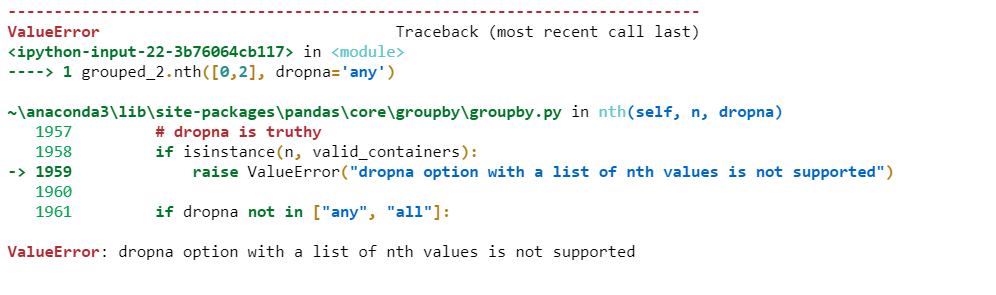

In [23]:
# we are selecting the 0th and 2nd rows, not rows whose indices equal 0 and 2.

grouped_2.take([0,2])

Emp_Id           Emp_Name                       Role Gender  \
Department                                                                 
AIML       0      1     Abhishek Kumar  Machine Learning Engineer      M   
           5      6  Ritesh Srivastava              Data Engineer      M   
DM         1      2        Arjun Kumar                  Tech Lead      M   
           3      4         Mika Singh               Data Analyst      F   

             WFH Status       DOB     Salary  
Department                                    
AIML       0          Y  04051990  1121000.0  
           5          Y       NaN   785000.0  
DM         1          Y  09031992   109000.0  
           3          Y  15101991        NaN

### Selecting group based on the condition that applies on the whole group

In [24]:
grouped_1 = emp_df_1.groupby('Department', as_index=False)
grouped_1

# The argument of filter must be a function that, applied to the group as a whole, returns True or False.

grouped_1.filter(lambda x: max(x['Salary']) >= 1121000.0)

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


In [25]:
# The argument of filter must be a function that, applied to the group as a whole, returns True or False.

grouped_1.filter(lambda x: min(x['Emp_Name'].str.len()) >= 10)

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


In [26]:
# The argument of filter must be a function that, applied to the group as a whole, returns True or False.

grouped_2.filter(lambda x: sum(x['Salary']) >= 950000)

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,Machine Learning Engineer,M,Y,04051990,1121000.0
4,5,Anusha Yenduri,Data Scientist,F,Y,01011989,921000.0
5,6,Ritesh Srivastava,Data Engineer,M,Y,NaN,785000.0


## 1.3 Aggregation Methods
- .agg()

    Aggregation methods (also called reduction methods) “smush” many data points into an aggregated statistic about those data points.
    An example is to take the sum, mean, or median of 10 numbers, where the result is just a single number. 

In [27]:
grouped_3 = emp_df_1.groupby('Department')
grouped_3

In [28]:
# grouped_3.agg(np.sum)

grouped_3.agg('sum')

,Salary
Department,
AIML,2827000.0
DM,936000.0


In [29]:
grouped_3.agg('mean')

,Salary
Department,
AIML,942333.333333
DM,468000.000000


### + Applying multiple functions at once

In [30]:
x= grouped_3.agg(['max','mean', 'min'])
x

Salary                         
                  max           mean       min
Department                                    
AIML        1121000.0  942333.333333  785000.0
DM           827000.0  468000.000000  109000.0

### - End

### + Analysing the aggregated result dataframe

In [31]:
x.ndim

2

In [32]:
x.size

6

In [33]:
x.shape

(2, 3)

In [34]:
len(x)

2

In [35]:
x.iloc[:,2:]

,Salary
,min
Department,
AIML,785000.0
DM,109000.0


In [36]:
x.columns
x.columns[0]

MultiIndex([('Salary',  'max'),
            ('Salary', 'mean'),
            ('Salary',  'min')],
           )

('Salary', 'max')

In [37]:
x.index
x.index[0]

Index(['AIML', 'DM'], dtype='object', name='Department')

'AIML'

### - End

In [38]:
# as_index = False does not create the groupby columns as Indexes

grouped_3a = emp_df_1.groupby(['Department','Gender'], as_index = False)
grouped_3a

In [39]:
grouped_3a.agg('sum')
grouped_3a['Salary'].agg(['sum'])

,Department,Gender,Salary
0,AIML,F,921000.0
1,AIML,M,1906000.0
2,DM,F,0.0
3,DM,M,936000.0


sum
Department Gender           
AIML       F        921000.0
           M       1906000.0
DM         F             0.0
           M        936000.0

In [40]:
# We can also use the reset_index DataFrame function to achieve the same result as the column names are stored in the resulting MultiIndex

emp_df_1.groupby(['Department','Gender']).sum().reset_index()

,Department,Gender,Salary
0,AIML,F,921000.0
1,AIML,M,1906000.0
2,DM,F,0.0
3,DM,M,936000.0


In [41]:
grouped_3a.size()
grouped_3a.size().reset_index()

,Department,Gender,size
0,AIML,F,1
1,AIML,M,2
2,DM,F,1
3,DM,M,2


,index,Department,Gender,size
0,0,AIML,F,1
1,1,AIML,M,2
2,2,DM,F,1
3,3,DM,M,2


In [42]:
grouped_3a.describe()

Salary                                                                    \
   count      mean            std       min       25%       50%        75%   
0    1.0  921000.0            NaN  921000.0  921000.0  921000.0   921000.0   
1    2.0  953000.0  237587.878479  785000.0  869000.0  953000.0  1037000.0   
2    0.0       NaN            NaN       NaN       NaN       NaN        NaN   
3    2.0  468000.0  507702.668892  109000.0  288500.0  468000.0   647500.0   

              
         max  
0   921000.0  
1  1121000.0  
2        NaN  
3   827000.0

In [43]:
grouped_3a.aggregate('count')
grouped_3a.count()
grouped_3a.agg(lambda x: x.count())

,Department,Gender,Emp_Id,Emp_Name,Role,WFH Status,DOB,Salary
0,AIML,F,1,1,1,1,1,1
1,AIML,M,2,2,2,2,1,2
2,DM,F,1,1,1,1,1,0
3,DM,M,2,2,2,2,1,2


,Department,Gender,Emp_Id,Emp_Name,Role,WFH Status,DOB,Salary
0,AIML,F,1,1,1,1,1,1
1,AIML,M,2,2,2,2,1,2
2,DM,F,1,1,1,1,1,0
3,DM,M,2,2,2,2,1,2


,Department,Gender,Emp_Id,Emp_Name,Role,WFH Status,DOB,Salary
0,AIML,F,1,1,1,1,1,1.0
1,AIML,M,2,2,2,2,1,2.0
2,DM,F,1,1,1,1,1,0.0
3,DM,M,2,2,2,2,1,2.0


In [44]:
grouped_3a['Salary'].aggregate('count')
grouped_3a['Salary'].count()
grouped_3a['Salary'].agg(lambda x: x.count())

,Department,Gender,Salary
0,AIML,F,1
1,AIML,M,2
2,DM,F,0
3,DM,M,2


,Department,Gender,Salary
0,AIML,F,1
1,AIML,M,2
2,DM,F,0
3,DM,M,2


,Department,Gender,Salary
0,AIML,F,1.0
1,AIML,M,2.0
2,DM,F,0.0
3,DM,M,2.0


#### Note: The aggregating functions above will exclude NA values. 

### Renaming column labels

    i. .rename()
    ii. Named Aggregation

#### i. .rename()

In [45]:
grouped_3b = emp_df_1.groupby(['Department','Gender'])
grouped_3b

In [46]:
grouped_3b.agg(['min','max','mean'])
grouped_3b.agg(['min','max','mean']).rename(columns = { 'min' : 'Least', 'max': 'Most', 'mean':'Avg'})

Salary                     
                        min        max      mean
Department Gender                               
AIML       F       921000.0   921000.0  921000.0
           M       785000.0  1121000.0  953000.0
DM         F            NaN        NaN       NaN
           M       109000.0   827000.0  468000.0

Salary                     
                      Least       Most       Avg
Department Gender                               
AIML       F       921000.0   921000.0  921000.0
           M       785000.0  1121000.0  953000.0
DM         F            NaN        NaN       NaN
           M       109000.0   827000.0  468000.0

#### ii. NamedAggregation

    To support column-specific aggregation with control over the output column names, pandas accepts the special syntax in GroupBy.agg(), known as “named aggregation”, where

    i. The keywords are the output column names

    ii. The values are tuples whose first element is the column to select and the second element is the aggregation to apply to that column.
    
    iii. Pandas provides the pandas.NamedAgg namedtuple with the fields ['column', 'aggfunc'] to make it clearer what the arguments are. As usual, the aggregation can be a callable or a string alias.

In [47]:
# Named Tuple

grouped_3b.agg( Max_Sal = pd.NamedAgg( column = 'Salary' , aggfunc = 'max'),
                Min_Sal = pd.NamedAgg( column = 'Salary' , aggfunc = 'min'),
                Avg_Sal = pd.NamedAgg( column = 'Salary' , aggfunc = 'mean'))


# Plain Tuple
# Also, the index is reset here.

grouped_3b.agg( Max_Sal = pd.NamedAgg( 'Salary' ,  'max'),
                Min_Id = pd.NamedAgg( 'Emp_Id' ,  'min'),
                Avg_Sal = pd.NamedAgg( 'Salary' ,  'mean')).reset_index()


Max_Sal   Min_Sal   Avg_Sal
Department Gender                               
AIML       F        921000.0  921000.0  921000.0
           M       1121000.0  785000.0  953000.0
DM         F             NaN       NaN       NaN
           M        827000.0  109000.0  468000.0

,Department,Gender,Max_Sal,Min_Id,Avg_Sal
0,AIML,F,921000.0,5,921000.0
1,AIML,M,1121000.0,1,953000.0
2,DM,F,NaN,4,NaN
3,DM,M,827000.0,2,468000.0


### Applying different functions to DataFrame columns

    By passing a dict to aggregate we can apply a different aggregation to the columns of a DataFrame

In [48]:
grouped_3b.agg({ 'Salary' : lambda x: np.std(x, ddof=1)})

# index on Groupby columns is also reset.
grouped_3b.agg({ 'Salary' : 'mean', 'Role' : 'sum'}).reset_index()

Salary
Department Gender               
AIML       F                 NaN
           M       237587.878479
DM         F                 NaN
           M       507702.668892

,Department,Gender,Salary,Role
0,AIML,F,921000.0,Data Scientist
1,AIML,M,953000.0,Machine Learning EngineerData Engineer
2,DM,F,NaN,Data Analyst
3,DM,M,468000.0,Tech LeadDevops Engineer


## 1.4 Transformation
- .transform()

    Transformation methods return a DataFrame with the same shape and indices as the original, but with different values. 
    With both aggregation & filter methods, the resulting DataFrame will commonly be smaller in size than the input DF. 
    This is not true of a transformation, which transforms individual values themselves but retains d shape of the original DataFrame.

In [118]:
grouped_3c = emp_df_1.groupby(['Department'],as_index=False)
grouped_3c.count()

,Department,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary
0,AIML,3,3,3,3,3,2,3,3,3,3
1,DM,3,3,3,3,3,2,2,3,3,2


In [119]:
# Here i have not created a new column
# But a new column can be created 

# If i would not have created the groupby object with as_index=false, .....
# ... then passing a column name , here like, Salary would have returned a series output
emp_df_1
transformed = grouped_3c['Salary'].transform(lambda x : x.fillna(x.mean()))
transformed

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0,39.653343
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0,11.645299
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0,88.354701
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0,32.578705
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0,27.767952


,Salary
0,1121000.0
1,109000.0
2,827000.0
3,468000.0
4,921000.0
5,785000.0


In [122]:
# Here i have  created a new column

# If i would not have created the groupby object with as_index=false, .....
# ... then passing a column name , here like, Salary would have returned a series output
emp_df_1
emp_df_1['NANfilledWithMeanSal'] = grouped_3c['Salary'].transform(lambda x : x.fillna(x.mean()))
emp_df_1
emp_df_1['MeanSalofthegroup'] = grouped_3c['Salary'].transform(lambda x : x.mean())
emp_df_1

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary,MeanSal,NANfilledWithMeanSal,MeanSalofthegroup
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0,39.653343,1121000.0,1121000.0,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0,11.645299,109000.0,109000.0,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0,88.354701,827000.0,827000.0,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0,NaN,468000.0,468000.0,468000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0,32.578705,921000.0,921000.0,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0,27.767952,785000.0,785000.0,785000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary,MeanSal,NANfilledWithMeanSal,MeanSalofthegroup
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0,39.653343,1121000.0,1121000.0,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0,11.645299,109000.0,109000.0,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0,88.354701,827000.0,827000.0,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0,NaN,468000.0,468000.0,468000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0,32.578705,921000.0,921000.0,921000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0,27.767952,785000.0,785000.0,785000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary,MeanSal,NANfilledWithMeanSal,MeanSalofthegroup
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0,39.653343,1121000.0,1121000.0,942333.333333
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0,11.645299,109000.0,109000.0,468000.000000
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0,88.354701,827000.0,827000.0,468000.000000
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0,NaN,468000.0,468000.0,468000.000000
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0,32.578705,921000.0,921000.0,942333.333333
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0,27.767952,785000.0,785000.0,942333.333333


In [51]:
# Using transform to get boolean values and then passing this boolean value to the dataframe to get the correct record
# NOT WORKING AS EXPECTED

emp_df_1['MaxSalary'] = grouped_1['Salary'].transform('max')
emp_df_1

emp_df_1['SumSalary'] = grouped_1['Salary'].transform('sum')
emp_df_1

emp_df_1['PctSalary'] = emp_df_1['Salary']/emp_df_1['SumSalary'] * 100
emp_df_1

# emp_df_1['PctSalary_2'] = grouped_1['Salary'].transform(lambda x : x.sum)
# emp_df_1

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,MaxSalary,SumSalary,PctSalary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1121000.0,2827000.0,39.653343
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,827000.0,936000.0,11.645299
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,827000.0,936000.0,88.354701
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,827000.0,936000.0,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,1121000.0,2827000.0,32.578705
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,1121000.0,2827000.0,27.767952


In [52]:
grouped_trans = transformed.groupby(level=0)
grouped_trans.count()

,Emp_Id,Salary
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1


### + Window and resample operations

    i. rolling()
    ii. expanding()
    iii. resample()

In [53]:
df_re = pd.DataFrame({'A': [1] * 10 + [5] * 10,
                      'B': np.arange(20)})
df_re.head()
df_re.tail()

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


,A,B
15,5,15
16,5,16
17,5,17
18,5,18
19,5,19


In [54]:
# This will apply the rolling() method on the samples of the column B based on the groups of column A.

df_re.groupby('A').rolling(4).B.sum()

A    
1  0      NaN
   1      NaN
   2      NaN
   3      6.0
   4     10.0
   5     14.0
   6     18.0
   7     22.0
   8     26.0
   9     30.0
5  10     NaN
   11     NaN
   12     NaN
   13    46.0
   14    50.0
   15    54.0
   16    58.0
   17    62.0
   18    66.0
   19    70.0
Name: B, dtype: float64

In [55]:
# The expanding() method will accumulate a given operation (sum() in the example) for all the members of each particular group.

df_re.groupby('A').expanding().B.sum()

A    
1  0       0.0
   1       1.0
   2       3.0
   3       6.0
   4      10.0
   5      15.0
   6      21.0
   7      28.0
   8      36.0
   9      45.0
5  10     10.0
   11     21.0
   12     33.0
   13     46.0
   14     60.0
   15     75.0
   16     91.0
   17    108.0
   18    126.0
   19    145.0
Name: B, dtype: float64

In [56]:
# ReSampling is not yet covered...

## Iteration 2

In [57]:
df1 = pd.DataFrame({'id': [1,2],
                   'name': ['a','b'],
                   'prem1' : [100,280],
                   'prem2' : [np.NaN,180],
                   'prem3' : [300,np.NaN],
                   'disc1' : [20,40],
                   'disc2' : [np.NaN,30],
                   'disc3' : [50,np.NaN],})
df1

,id,name,prem1,prem2,prem3,disc1,disc2,disc3
0,1,a,100,NaN,300.0,20,NaN,50.0
1,2,b,280,180.0,NaN,40,30.0,NaN


In [58]:
df1_melted = pd.wide_to_long(df1, i=['id','name'], j='month', stubnames=['prem','disc'])
df_long = df1_melted.reset_index()

In [59]:
df_long

,id,name,month,prem,disc
0,1,a,1,100.0,20.0
1,1,a,2,NaN,NaN
2,1,a,3,300.0,50.0
3,2,b,1,280.0,40.0
4,2,b,2,180.0,30.0
5,2,b,3,NaN,NaN


In [60]:
# Returns min value for each columns within each group

df_long.groupby('id').min()

,name,month,prem,disc
id,,,,
1,a,1,100.0,20.0
2,b,1,180.0,30.0


In [125]:
# Returns max value for each columns within each group
df_long.groupby('id')['prem'].max().pipe(pd.DataFrame)


,prem
id,
1,300.0
2,280.0


### FIRST and LAST returns the non-null value

In [62]:
df_long.groupby('id').first()

,name,month,prem,disc
id,,,,
1,a,1,100.0,20.0
2,b,1,280.0,40.0


In [63]:
df_long.groupby('id').last()

,name,month,prem,disc
id,,,,
1,a,3,300.0,50.0
2,b,3,180.0,30.0


### HEAD() and TAIL() - returns the actual head( n ) and tail( n ) records

In [64]:
df_long.groupby('id').head(2)

,id,name,month,prem,disc
0,1,a,1,100.0,20.0
1,1,a,2,NaN,NaN
3,2,b,1,280.0,40.0
4,2,b,2,180.0,30.0


In [65]:
df_long.groupby('id').tail(1)

,id,name,month,prem,disc
2,1,a,3,300.0,50.0
5,2,b,3,NaN,NaN


In [66]:
df_long2 = df_long.sort_values(['id','prem'])

In [67]:
df_long2.groupby('id').head(2)

,id,name,month,prem,disc
0,1,a,1,100.0,20.0
2,1,a,3,300.0,50.0
4,2,b,2,180.0,30.0
3,2,b,1,280.0,40.0


In [68]:
df_long2.groupby('id').tail(1)

,id,name,month,prem,disc
1,1,a,2,NaN,NaN
5,2,b,3,NaN,NaN


### Another way to get the first and last row is to find the INDEX of MIN or MAX value of a columns and use that index to filter out records

- idxmin() and idxmax()

In [69]:
### Here, idxmax() finds the indices of the rows with max value within groups,
### and .loc() filters the rows using those indices :

df_long2.loc[df_long2.groupby(["id"])["prem"].idxmax()]
df_long2.loc[df_long2.groupby(["id"])["prem"].idxmin()]

,id,name,month,prem,disc
2,1,a,3,300.0,50.0
3,2,b,1,280.0,40.0


,id,name,month,prem,disc
0,1,a,1,100.0,20.0
4,2,b,2,180.0,30.0


## TRANSFORM

https://pbpython.com/pandas_transform.html

### Creating a FLAG 🚩 , indicating the MAX or MIN value

In [70]:
df_long['flag'] = df_long.groupby('id')['prem'].transform(lambda x : x == x.max())
df_long

,id,name,month,prem,disc,flag
0,1,a,1,100.0,20.0,False
1,1,a,2,NaN,NaN,False
2,1,a,3,300.0,50.0,True
3,2,b,1,280.0,40.0,True
4,2,b,2,180.0,30.0,False
5,2,b,3,NaN,NaN,False


### Using transform to perform filtering of rows
- Transform will help to create a new column or a flag
- Based on the new flag, we will filter out rows

### Examples
- 1. Simple Scenario :
    - Selecting rows with the highest / max / lowest /  min values : This can be achieved using sorting by sort_values() and head() and tail()
- 2. Not straighforward Scenario :
    - But incase of scenarios, wherein, the selection criteria is not straightforward like MIN/MAX, instead like MEAN or PCT. 
        - Then we need to first find the mean or pct within each group and find the rows which satisfy those condition.

In [71]:
# Simple scenario
# This is handled using SORT_VALUES() and HEAD()

df_long.sort_values(['id','prem'], ascending=[True, False], inplace = True)
df_long.groupby('id').head(1)

,id,name,month,prem,disc,flag
2,1,a,3,300.0,50.0,True
3,2,b,1,280.0,40.0,True


In [72]:
df_long[df_long.groupby('id')['prem'].transform(lambda x : x == x.max())]

,id,name,month,prem,disc,flag
2,1,a,3,300.0,50.0,True
3,2,b,1,280.0,40.0,True


In [73]:
# Complex scenario

df_long[df_long.groupby('id')['prem'].transform(lambda x : x <= x.mean())]

,id,name,month,prem,disc,flag
0,1,a,1,100.0,20.0,False
4,2,b,2,180.0,30.0,False


### Alternate way :
### Transform creates a new variable , without changing the shape of the dataframe.
- It does not filter any records.  ( But can be used to filter record, by passing the BOOLEAN Value created within transform() to the original dataframe. )
    - See the above example
- In case of any requirement of creating a FLAG 🚩 , indicating the MAX or MIN value , the new column can be checked for equality using ==

In [74]:
df_long['flag'] = df_long.groupby('id')['prem'].transform('max')
df_long

,id,name,month,prem,disc,flag
2,1,a,3,300.0,50.0,300.0
0,1,a,1,100.0,20.0,300.0
1,1,a,2,NaN,NaN,300.0
3,2,b,1,280.0,40.0,280.0
4,2,b,2,180.0,30.0,280.0
5,2,b,3,NaN,NaN,280.0


In [75]:
df_long['flag'] = df_long['prem'] == df_long.groupby('id')['prem'].transform('max')
df_long

,id,name,month,prem,disc,flag
2,1,a,3,300.0,50.0,True
0,1,a,1,100.0,20.0,False
1,1,a,2,NaN,NaN,False
3,2,b,1,280.0,40.0,True
4,2,b,2,180.0,30.0,False
5,2,b,3,NaN,NaN,False


https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/

## Creating running totals with cumsum( )

In [76]:
d = {"salesperson":["Nico", "Carlos", "Juan", "Nico", "Nico", "Juan", "Maria", "Carlos"], "item":[10, 120, 130, 200, 300, 550, 12.3, 200]}
df = pd.DataFrame(d)
df

df["running_total"] = df["item"].cumsum()
df["running_total_by_person"] = df.groupby("salesperson")["item"].cumsum()
df

,salesperson,item
0,Nico,10.0
1,Carlos,120.0
2,Juan,130.0
3,Nico,200.0
4,Nico,300.0
5,Juan,550.0
6,Maria,12.3
7,Carlos,200.0


,salesperson,item,running_total,running_total_by_person
0,Nico,10.0,10.0,10.0
1,Carlos,120.0,130.0,120.0
2,Juan,130.0,260.0,130.0
3,Nico,200.0,460.0,210.0
4,Nico,300.0,760.0,510.0
5,Juan,550.0,1310.0,680.0
6,Maria,12.3,1322.3,12.3
7,Carlos,200.0,1522.3,320.0


## Calculate running count with groups using cumcount() + 1

In [77]:
d = {"salesperson":["Nico", "Carlos", "Juan", "Nico", "Nico", "Juan", "Maria", "Carlos"], "item":["Car", "Truck", "Car", "Truck", "cAr", "Car", "Truck", "Moto"]}
df = pd.DataFrame(d)
df

# Fixing columns
df["salesperson"] = df["salesperson"].str.title()
df["item"] = df["item"].str.title()

df["count_by_person"] = df.groupby("salesperson").cumcount() + 1
df["count_by_item"] = df.groupby("item").cumcount() + 1
df["count_by_both"] = df.groupby(["salesperson","item"]).cumcount() + 1
df

,salesperson,item
0,Nico,Car
1,Carlos,Truck
2,Juan,Car
3,Nico,Truck
4,Nico,cAr
5,Juan,Car
6,Maria,Truck
7,Carlos,Moto


,salesperson,item,count_by_person,count_by_item,count_by_both
0,Nico,Car,1,1,1
1,Carlos,Truck,1,1,1
2,Juan,Car,1,2,1
3,Nico,Truck,2,2,1
4,Nico,Car,3,3,2
5,Juan,Car,2,4,2
6,Maria,Truck,1,3,1
7,Carlos,Moto,2,1,1


In [78]:
# Creating a new dataframe
emp_df3 = emp_df.copy()

In [79]:
emp_df3.groupby('Department').first()
emp_df3.groupby('Department').head(1)

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,1,Abhishek Kumar,Machine Learning Engineer,M,Y,04051990,1121000.0
DM,2,Arjun Kumar,Tech Lead,M,Y,09031992,109000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0


In [80]:
emp_df3.groupby('Department').last()
emp_df3.groupby('Department').tail(1)

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,01011989,785000.0
DM,4,Mika Singh,Data Analyst,F,Y,15101991,827000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


In [81]:
emp_df3.sort_values(['Department','Emp_Name'], ascending=True).groupby('Department').last()
emp_df3.sort_values(['Department','Emp_Name'], ascending=False).groupby('Department').tail(1)

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,01011989,785000.0
DM,3,Vivek Raj,Devops Engineer,M,N,15101991,827000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0


In [82]:
emp_df3.sort_values(['Department','Salary'], ascending=False).groupby('Department').last()
emp_df3.sort_values(['Department','Salary'], ascending=False).groupby('Department').tail(1)

,Emp_Id,Emp_Name,Role,Gender,WFH Status,DOB,Salary
Department,,,,,,,
AIML,6,Ritesh Srivastava,Data Engineer,M,Y,01011989,785000.0
DM,4,Mika Singh,Data Analyst,F,Y,15101991,109000.0


,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0


## To generate ranking within each group
- method = 'first' / 'dense' / 'min' / 'max' / 'average'
- ascending = True/False
- pct = True

### Example 1

In [83]:
emp_df3.dtypes
emp_df3['Salary'] = emp_df3['Salary'].astype('float')

Emp_Id         object
Emp_Name       object
Department     object
Role           object
Gender         object
WFH Status     object
DOB            object
Salary        float64
dtype: object

In [84]:
# Rank() does not work when rank is done on NON-Numeric column
emp_df3['default_rank2'] = emp_df3.groupby('Department')[['Salary']].rank(ascending=False)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0


In [85]:
emp_df3['default_rank'] = emp_df3['Salary'].rank()
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,NaN,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0


### Example 2

In [86]:
data = {'close_date': ["2012-08-01", "2012-08-01", "2012-08-01", "2012-08-02", "2012-08-03", "2012-08-04", "2012-08-05", "2012-08-07"],
        'seller_name': ["Lara", "Julia", "Julia", "Emily", "Julia", "Lara", "Julia", "Julia"]
       }
df = pd.DataFrame(data)

In [87]:
df['close_date'] = pd.to_datetime(df['close_date'])

In [88]:
df['rank_seller_by_close_date'] = df.groupby('seller_name')['close_date'].rank(method='first')

## Other functions

In [89]:

emp_df3['default_rank3'] = emp_df3.groupby('Department')['default_rank'].bfill()
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,NaN,NaN,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0


In [90]:
emp_df3.sort_values(['Department','Salary'], ascending=True).groupby('Department')['Salary'].nth(0).to_frame().reset_index()
# emp_df3

,Department,Salary
0,AIML,785000.0
1,DM,109000.0


In [131]:
# This throws error bcoz unique() is not available for DataFrameGroupBy, instaed only for SeriesGroupBy
# emp_df3.groupby('Department',as_index=False)['Role'].unique()

# So, the output rsult is in form of series... which can be piped to a dataframe
emp_df3.groupby('Department')['Role'].unique()
emp_df3.groupby('Department')['Role'].unique().pipe(pd.DataFrame) 

Department
AIML    [Machine Learning Engineer, Data Scientist, Da...
DM             [Tech Lead, Data Analyst, Devops Engineer]
Name: Role, dtype: object

,Role
Department,
AIML,"[Machine Learning Engineer, Data Scientist, Da..."
DM,"[Tech Lead, Data Analyst, Devops Engineer]"


In [128]:
emp_df3.groupby('Department')['Role'].nunique()
emp_df3.groupby('Department',as_index=False)['Role'].nunique()

Department
AIML    3
DM      3
Name: Role, dtype: int64

,Department,Role
0,AIML,3
1,DM,3


In [93]:
ods = emp_df3.groupby('Department', as_index = False)
ods['Role'].count()

,Department,Role
0,AIML,3
1,DM,3


In [94]:
emp_df3.groupby('Department', as_index = False)['Role'].size()

,Department,size
0,AIML,3
1,DM,3


In [95]:
emp_df3.groupby('Department')['Role'].describe()

,count,unique,top,freq
Department,,,,
AIML,3,3,Data Engineer,1
DM,3,3,Tech Lead,1


In [96]:
emp_df3.groupby('Department')['Gender'].value_counts()

Department  Gender
AIML        M         2
            F         1
DM          M         2
            F         1
Name: Gender, dtype: int64

In [127]:
emp_df3.groupby('Department')['Salary'].nlargest()
emp_df3.groupby('Department')['Salary'].nlargest()

Department   
AIML        0    1121000.0
            4     921000.0
            5     785000.0
DM          2     827000.0
            1     109000.0
            3          0.0
Name: Salary, dtype: float64

Department   
AIML        0    1121000.0
            4     921000.0
            5     785000.0
DM          2     827000.0
            1     109000.0
            3          0.0
Name: Salary, dtype: float64

In [98]:
emp_df3.groupby('Department')['Salary'].nsmallest()

Department   
AIML        5     785000.0
            4     921000.0
            0    1121000.0
DM          1     109000.0
            2     827000.0
Name: Salary, dtype: float64

In [99]:
emp_df3.groupby('Department')['Salary'].sum()

Department
AIML    2827000.0
DM       936000.0
Name: Salary, dtype: float64

In [100]:
# as_index helps to create a dataframe
emp_df3.groupby('Department', as_index=False)['Salary'].min()

,Department,Salary
0,AIML,785000.0
1,DM,109000.0


In [101]:
emp_df3.groupby('Department')['Salary'].max()

Department
AIML    1121000.0
DM       827000.0
Name: Salary, dtype: float64

In [102]:
emp_df3.groupby('Department')['Salary'].mean()

Department
AIML    942333.333333
DM      468000.000000
Name: Salary, dtype: float64

In [103]:
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,NaN,NaN,NaN,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0


## Cumulative sum within each group using CUMSUM( )

In [104]:
emp_df3['Salary'].fillna(0, inplace=True)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0


In [105]:
emp_df3['cum_sal'] = emp_df3.groupby('Department')['Salary'].cumsum()
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0


## To generate a sequential rownumber using CUMCOUNT() + 1

In [106]:
emp_df3['Count'] = emp_df3.sort_values(['Department','Emp_Name'], ascending=True).groupby('Department')['Emp_Name'].cumcount()+1
emp_df3.sort_values(['Department','Emp_Name'], ascending=True, inplace=True)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3


#### Alternate way, not effective

In [107]:
tmp = emp_df3.groupby('Department')['Emp_Name'].cumcount().reset_index()
tmp
tmp.rename(columns={tmp.columns[-1]:'new'},inplace=True)
tmp

,index,0
0,0,0
1,4,1
2,5,2
3,1,0
4,3,1
5,2,2


,index,new
0,0,0
1,4,1
2,5,2
3,1,0
4,3,1
5,2,2


In [108]:
emp_df3 = pd.merge(emp_df3,tmp, left_index=True, right_index=True).drop('index', axis=1)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2


## LAG (+n) / LEAD (-n) functionality
## To retrieve previous  (+n) /ahead (-n) values using SHIFT(n / -n)
- shift(n) : LAG 
- shift(-n) : LEAD

In [109]:
emp_df3.sort_values(['Department','Salary'],inplace=True)
emp_df3['PrevSal'] = emp_df3.groupby('Department')['Salary'].shift(1)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0


## Retain the last filled value to fill the NaN cells
## Using FILLNA( method = 'bfill' / 'ffill' )

### bfill - backward fill : Go Backward and fill the empty cell
### ffill  - forward fill    : Go Forward and fill the empty cell


In [110]:
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0


In [111]:
emp_df3.loc[emp_df3.Emp_Id.isin( ['4','6']), 'PrevSal'] = np.NaN
emp_df3.sort_values(['Department','Emp_Name'], inplace = True)
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0


In [112]:
emp_df3['ForwardFilledPrevSal'] = emp_df3.groupby('Department')['PrevSal'].fillna(method = 'ffill')
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal,ForwardFilledPrevSal
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0,921000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0,785000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN,785000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0,0.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN,0.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0,109000.0


In [113]:
emp_df3['BackwardFilledPrevSal'] = emp_df3.groupby('Department')['PrevSal'].fillna(method = 'bfill')
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal,ForwardFilledPrevSal,BackwardFilledPrevSal
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0,921000.0,921000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0,785000.0,785000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN,785000.0,NaN
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0,0.0,0.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN,0.0,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0,109000.0,109000.0


## filling-missing-values-by-mean-in-each-group

In [114]:
emp_df3['MeanFilledPrevSal'] = emp_df3.groupby('Department')['BackwardFilledPrevSal'].transform(lambda x: x.fillna(x.mean()))
emp_df3

,Emp_Id,Emp_Name,Department,Role,Gender,WFH Status,DOB,Salary,default_rank2,default_rank,default_rank3,cum_sal,Count,new,PrevSal,ForwardFilledPrevSal,BackwardFilledPrevSal,MeanFilledPrevSal
0,1,Abhishek Kumar,AIML,Machine Learning Engineer,M,Y,04051990,1121000.0,1.0,5.0,5.0,1121000.0,1,0,921000.0,921000.0,921000.0,921000.0
4,5,Anusha Yenduri,AIML,Data Scientist,F,Y,01011989,921000.0,2.0,4.0,4.0,2042000.0,2,1,785000.0,785000.0,785000.0,785000.0
5,6,Ritesh Srivastava,AIML,Data Engineer,M,Y,NaN,785000.0,3.0,2.0,2.0,2827000.0,3,2,NaN,785000.0,NaN,853000.0
1,2,Arjun Kumar,DM,Tech Lead,M,Y,09031992,109000.0,2.0,1.0,1.0,109000.0,1,1,0.0,0.0,0.0,0.0
3,4,Mika Singh,DM,Data Analyst,F,Y,15101991,0.0,NaN,NaN,NaN,936000.0,2,0,NaN,0.0,109000.0,109000.0
2,3,Vivek Raj,DM,Devops Engineer,M,N,NaN,827000.0,1.0,3.0,3.0,936000.0,3,2,109000.0,109000.0,109000.0,109000.0


## These are the two chaining ways to create a Pandas dataframe out of Series Object
- `.pipe(pd.DataFrame)`
- `.to_frame()`

### References:

#### 1. [Pandas Documentation](#https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
#### 2. [Reference Documentation](#https://pandas.pydata.org/docs/reference/groupby.html)
#### 3. [Real Python](#https://realpython.com/pandas-groupby/)
#### 4. [TDS - Window Functions](#https://towardsdatascience.com/window-functions-in-pandas-eaece0421f7)